In [1]:
import tensorflow as tf

print(tf.config.list_physical_devices('GPU'))

2023-08-15 21:14:21.662840: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-15 21:14:22.853637: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2023-08-15 21:14:23.910667: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-15 21:14:24.175956: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-15 21:14:24.176139: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [ ]:
%pip install datasets
%pip install matplotlib

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import backend as K
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Helper functions
def show_min_max(array, i):
  random_image = array[i]
  print("min and max value in image: ", random_image.min(), random_image.max())


def plot_image(array, i, labels):
  plt.imshow(np.squeeze(array[i]))
  plt.title(str(label_names[labels[i]]))
  plt.xticks([])
  plt.yticks([])
  plt.show()


In [3]:
num_columns = 28
num_rows = 28

In [4]:
num_classes = 345 

In [5]:
input_shape = (num_columns, num_rows, 1)

In [6]:
from datasets import load_dataset

dataset = load_dataset("Xenova/quickdraw-small")


train_data = pd.DataFrame(dataset['train'][0:400000])
test_data = pd.DataFrame(dataset['test'][0:20000])
valid_data = pd.DataFrame(dataset['valid'][0:30000])

C:\Users\Student\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
train_images = np.array([np.asarray(image) for image in train_data["image"]])
test_images = np.array([np.asarray(image) for image in test_data["image"]])
valid_images = np.array([np.asarray(image) for image in valid_data["image"]])
train_labels = np.array([np.asarray(image) for image in train_data["label"]])
test_labels = np.array([np.asarray(image) for image in test_data["label"]])
valid_labels = np.array([np.asarray(image) for image in valid_data["label"]])

In [8]:
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)
valid_images = valid_images.reshape(-1, 28, 28, 1)

In [10]:
import requests
label_names = requests.get("https://raw.githubusercontent.com/googlecreativelab/quickdraw-dataset/master/categories.txt").text.split("\n")

In [11]:
print(test_images.shape, train_images.shape, valid_images.shape)

(20000, 28, 28, 1) (400000, 28, 28, 1) (30000, 28, 28, 1)


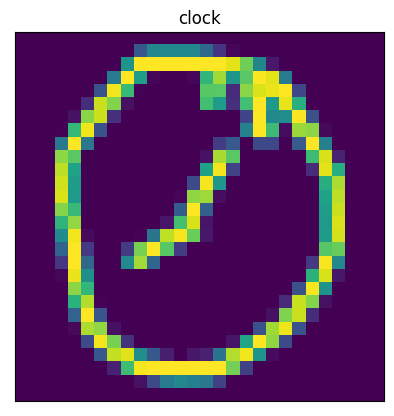

In [12]:
plot_image(train_images, 100, train_labels)

In [13]:
show_min_max(train_images, 100)

min and max value in image:  0 255


In [14]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
valid_images = valid_images.astype('float32')

In [15]:
train_images /= 255
test_images /= 255
valid_images /= 255

In [16]:
show_min_max(train_images, 100)

min and max value in image:  0.0 1.0


In [17]:
train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)
valid_labels = keras.utils.to_categorical(test_labels, num_classes)

In [18]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization 

In [19]:
epochs = 15
batch_size = 64
model = Sequential()

In [20]:
# model.pop()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.2))

In [21]:
model.add(BatchNormalization()) 

In [22]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(Dropout(rate=0.3)) 
model.add(BatchNormalization())

In [23]:
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(Dropout(rate=0.3)) 
model.add(BatchNormalization())

In [24]:
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=num_classes,activation='softmax'))

In [25]:
# model.build(input_shape)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 batch_normalization (BatchN  (None, 12, 12, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        3

In [26]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])
model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_data=(test_images, test_labels), shuffle=True)
scores=model.evaluate(test_images, test_labels,verbose=0)
print('Test accuracy:', scores[1])       

Epoch 1/15
6250/6250 [==============================] - 764s 122ms/step - loss: 2.8115 - accuracy: 0.3788 - val_loss: 2.1239 - val_accuracy: 0.5015
Epoch 2/15
6250/6250 [==============================] - 666s 107ms/step - loss: 2.0614 - accuracy: 0.5148 - val_loss: 1.8853 - val_accuracy: 0.5508
Epoch 3/15
6250/6250 [==============================] - 661s 106ms/step - loss: 1.8879 - accuracy: 0.5499 - val_loss: 1.7767 - val_accuracy: 0.5794
Epoch 4/15
6250/6250 [==============================] - 693s 111ms/step - loss: 1.7942 - accuracy: 0.5689 - val_loss: 1.7023 - val_accuracy: 0.5922
Epoch 5/15
6250/6250 [==============================] - 662s 106ms/step - loss: 1.7349 - accuracy: 0.5823 - val_loss: 1.6556 - val_accuracy: 0.6033
Epoch 6/15
6250/6250 [==============================] - 638s 102ms/step - loss: 1.6909 - accuracy: 0.5916 - val_loss: 1.6384 - val_accuracy: 0.6076
Epoch 7/15
6250/6250 [==============================] - 636s 102ms/step - loss: 1.6538 - accuracy: 0.5991 - val_

In [28]:
model.evaluate(test_images, test_labels)

625/625 [==============================] - 9s 15ms/step - loss: 1.5410 - accuracy: 0.6283


[1.5410195589065552, 0.628250002861023]

In [27]:
model.save('model.h5')